In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/MyDrive/Capstone/

Mounted at /content/gdrive
/content/gdrive/MyDrive/Capstone


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random

In [ ]:
# other
from tqdm import tqdm, tqdm_notebook, tqdm_pandas

tqdm.pandas()
tqdm_notebook().pandas()

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


In [ ]:
total_df = pd.read_csv('data/total_df.csv', low_memory = False)

## User Posting Sequence


In [ ]:
label1_users = total_df[total_df['target']==1].username.unique().tolist()
label0_users = total_df[total_df['target']==0].username.unique().tolist()

In [ ]:
label1_users = total_df[total_df['target']==1].username.unique().tolist()
sample_user = random.sample(label1_users,1)[0]

In [ ]:
total_df[(total_df['username']==sample_user)&(total_df['type']==0)].head(3)

,username,type,subreddit,date,text,ups,downs,num_response,target,first_sw_post,word_count,sent_count,last_active_date,first_active_date,dtl,num_activity
2005354,cvegee,0,relationship_advice,2020-08-15 04:24:10,"Youre so right, Im attracted to unhealthy rela...",2,0,0,1,2020-08-31 05:03:22,19,1,2020-08-31 05:03:22,2018-11-01 12:47:08,16.0,40
2005355,cvegee,0,relationship_advice,2020-08-15 04:23:29,"Im starting to see the light, all of the say n...",4,0,0,1,2020-08-31 05:03:22,13,1,2020-08-31 05:03:22,2018-11-01 12:47:08,16.0,40
2005356,cvegee,0,relationship_advice,2020-08-15 04:05:57,"Fair, I like that response. I dont want to fal...",1,0,0,1,2020-08-31 05:03:22,16,3,2020-08-31 05:03:22,2018-11-01 12:47:08,16.0,40


## Type of User Based on Posting Frequency and Number of Posts

In [ ]:
total_df['date'] = pd.to_datetime(total_df['date'], infer_datetime_format=True)
user_labels = total_df.groupby('username').target.first().reset_index()
total_df = total_df.sort_values(['username','date'], ascending=False)
user_num_activity = total_df.groupby('username')['type'].count().reset_index(name = 'num_activity')
total_df = total_df.merge(user_num_activity, on = 'username')
user_group_dates = total_df.groupby('username')['date'].apply(list).reset_index(name = 'dates')

In [ ]:
def get_mean_days_diff(datelist):

  diff_days = []

  for i in range(len(datelist)-1):
    date1 = datelist[i]
    date2 = datelist[i+1]

    diff_days.append((date1-date2).days)
  
  return np.mean(diff_days)

In [ ]:
user_group_dates['mean_days_diff'] = user_group_dates['dates'].progress_apply(get_mean_days_diff)

In [ ]:
user_activity_stats = user_group_dates.merge(user_num_activity, on = 'username').merge(user_labels, on = 'username')

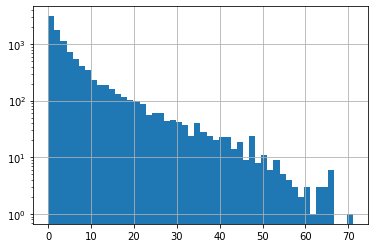

In [ ]:
user_activity_stats.mean_days_diff.hist(bins = 50, log = True)

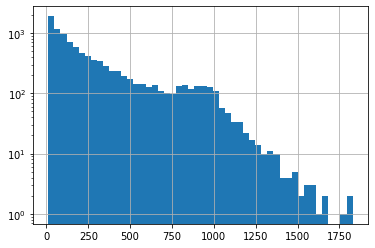

In [ ]:
user_activity_stats.num_activity.hist(bins = 50, log = True)

In [ ]:
display(user_activity_stats.num_activity.describe(),'','', user_activity_stats.mean_days_diff.describe())

count    10056.000000
mean       296.917363
std        307.085566
min         11.000000
25%         66.000000
50%        174.000000
75%        428.000000
max       1829.000000
Name: num_activity, dtype: float64

''

''

count    10056.000000
mean         6.595300
std          9.232089
min          0.000000
25%          1.112901
50%          2.943917
75%          7.782153
max         71.000000
Name: mean_days_diff, dtype: float64

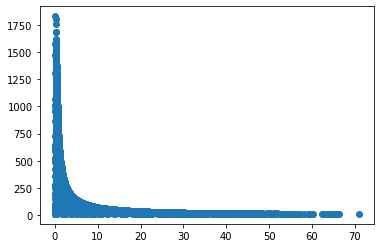

In [ ]:
plt.scatter(user_activity_stats['mean_days_diff'],user_activity_stats['num_activity'])

In [ ]:
# four different types of users
# high frequency (days between posts is low) low number of posts
hfln = user_activity_stats[(user_activity_stats['num_activity']<174) & (user_activity_stats['mean_days_diff']<2.943917)]
# high frequency (days between posts is low) high number of posts
hfhn = user_activity_stats[(user_activity_stats['num_activity']>174) & (user_activity_stats['mean_days_diff']<2.943917)]
# low frequency (days between posts is high) high number of posts
lfln = user_activity_stats[(user_activity_stats['num_activity']<174) & (user_activity_stats['mean_days_diff']>2.943917)]
# low frequency (days between posts is high) high number of posts
lfhn = user_activity_stats[(user_activity_stats['num_activity']>174) & (user_activity_stats['mean_days_diff']>2.943917)]

In [ ]:
display(hfln.shape, hfhn.shape, lfln.shape, lfhn.shape)

(420, 5)

(4604, 5)

(4595, 5)

(423, 5)

In [ ]:
display(hfln.target.value_counts(), hfhn.target.value_counts(), lfln.target.value_counts(), lfhn.target.value_counts())

1    317
0    103
Name: target, dtype: int64

0    2557
1    2047
Name: target, dtype: int64

1    2550
0    2045
Name: target, dtype: int64

0    266
1    157
Name: target, dtype: int64

In [ ]:
hfln.to_csv('hfln.csv', index=False)
hfhn.to_csv('hfhn.csv', index=False)
lfln.to_csv('lfln.csv', index=False)
lfhn.to_csv('lfhn.csv', index=False)

## Type of User Based on Posting History on Mental Health Subreddits
- Refining the subreddits to look into first. 

In [ ]:
metadata_count = total_df.groupby('subreddit').username.nunique().reset_index(name ='nunique')

In [ ]:
metadata_count

,subreddit,nunique
0,00snostalgia,2
1,070Shake,1
2,0ad,1
3,0sanitymemes,2
4,0ug,1
...,...,...
39316,zurich,1
39317,zx6r,1
39318,zyn,1
39319,zyramains,4


In [ ]:
metadata_count[metadata_count.subreddit\
                .apply(lambda x: x.lower()).str.contains('trans')]\
                .sort_values('nunique', ascending = False)[:30]

,subreddit,nunique
22840,asktransgender,239
36172,trans,128
36200,translator,124
36205,transpassing,92
36210,transtimelines,85
36209,transpositive,82
36192,transgendercirclejerk,60
36188,transgender,43
22768,ask_transgender,39
36211,transvoice,37


## Word Distributions

In [ ]:
user_type_df = pd.read_csv('data/total_user_type.csv')
timeless_df = total_df.groupby(['username'], as_index=False).agg({'text': ' '.join, 'target': np.mean,\
                                                                            'subreddit': list, 'word_count': np.sum, 'sent_count':np.sum})

timeless_df = timeless_df.merge(user_type_df, on = 'username')

In [ ]:
timeless_df.head()

,username,text,target,subreddit,word_count,sent_count,type,split
0,---AmoEboid---,"Thanks for the reply, it feels good at least n...",0,"[bipolar, bipolar, bipolar, bipolar, bipolar, ...",4149,322,lfln,train
1,--Doc_Holliday,"Lmfao I slept through it, I live a mile away. ...",0,"[CatastrophicFailure, penis, PublicFreakout, i...",6130,455,lfhn,train
2,--NoIdeaWhatImDoing,"Of course, my only issue is she is in kind of ...",0,"[Stoicism, Stoicism, Stoicism, ddpyoga, keto, ...",1894,129,lfln,train
3,--Solus,Resources to help MotherInLaw who is in over h...,1,"[RealEstate, homeowners, funny, Columbus, soci...",6603,599,hfhn,train
4,-AnxiousWallflower-,"oh, i know i’m mentally ill, probably with mor...",1,"[mentalhealth, AmItheAsshole, AmItheAsshole, s...",4372,356,lfln,train


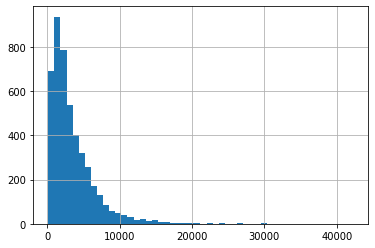

In [ ]:
timeless_df[timeless_df['type']=='lfln']['word_count'].hist(bins = 50)

In [ ]:
timeless_df[timeless_df['type']=='lfln']['word_count'].describe()

count     4595.000000
mean      3500.867900
std       3329.638694
min        137.000000
25%       1374.000000
50%       2514.000000
75%       4586.000000
max      42201.000000
Name: word_count, dtype: float64

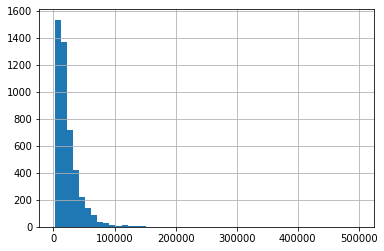

In [ ]:
timeless_df[timeless_df['type']=='hfhn']['word_count'].hist(bins = 50) # TLSTM 

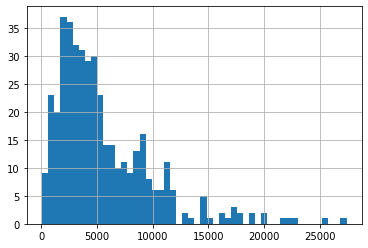

In [ ]:
timeless_df[timeless_df['type']=='hfln']['word_count'].hist(bins = 50)

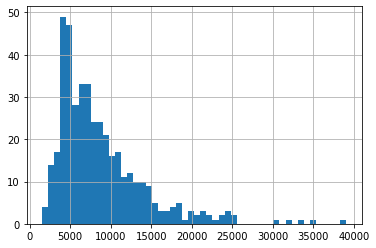

In [ ]:
timeless_df[timeless_df['type']=='lfhn']['word_count'].hist(bins = 50)